<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Registration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Point Based Registration

In [1]:
!pip -q install scikit-surgerycore

Registration using Orthogonal Procrustes method:<br>
using "Least-Squares Fitting of two, 3-D Point Sets, Arun, 1987"<br>
Fiducial/landmark: Fiducial points are points on your specimen that you mark to help you align subsequent sections. 



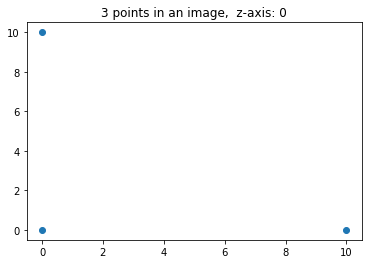

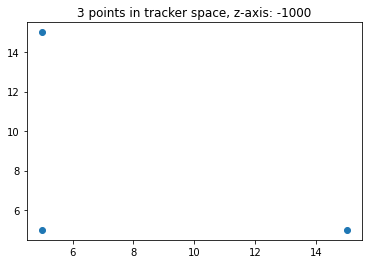

# Compute Transformation from image to tracker:
Rotation R:
 [[ 1.00000000e+00 -4.26642159e-17  0.00000000e+00]
 [ 3.58404070e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Translation t:
 [[    5.]
 [    5.]
 [-1000.]]
Fiducial Registration Error, FRE:
 1.4503892858778862e-15
Transformation T:
 [[ 1.00000000e+00 -4.26642159e-17  0.00000000e+00  5.00000000e+00]
 [ 3.58404070e-17  1.00000000e+00  0.00000000e+00  5.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -1.00000000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
# Compute Transformation from tracker to image:
Rotation R:
 [[ 1.00000000e+00 -4.26642159e-17  0.00000000e+00]
 [ 3.58404070e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Translation t:
 [[  -5.]
 [  -5.]
 [1000.]]
Fiducial Registration Error, FRE:
 1.9186846773327266e-15
Transformation T:
 [[ 1.00000000e+00 -4.26642159e-17  0.00000000e+00 -5.000

In [12]:
import sys
# All imports for this notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Note that the scikit-surgery libraries provide point-based registration using Arun's method and matrix utilities.
import sksurgerycore.algorithms.procrustes as pbr
import sksurgerycore.transforms.matrix as mu

# Define 3 points, as if they were in an image
image_points = np.zeros((3,3))
image_points[0][0] = 0
image_points[0][1] = 0
image_points[0][2] = 0

image_points[1][0] = 10
image_points[1][1] = 0
image_points[1][2] = 0

image_points[2][0] = 0
image_points[2][1] = 10
image_points[2][2] = 0

# Draw them in 2D. Its a triangle.
plt.scatter(image_points[:,0], image_points[:,1])
plt.title('3 points in an image,  z-axis: 0')
plt.show()

# Define 3 points, as if they were in tracker space
tracker_points = np.zeros((3,3))
tracker_points[0][0] = 5
tracker_points[0][1] = 5
tracker_points[0][2] = -1000

tracker_points[1][0] = 15
tracker_points[1][1] = 5
tracker_points[1][2] = -1000

tracker_points[2][0] = 5
tracker_points[2][1] = 15
tracker_points[2][2] = -1000

# Draw them in 2D. Its a triangle, same point order, different location.
plt.scatter(tracker_points[:,0], tracker_points[:,1])
plt.title('3 points in tracker space, z-axis: -1000')
plt.show()

# Compute Transformation from image to tracker
# Implements point based registration via the Orthogonal Procrustes method. Based on Arun's method
R, t, FRE = pbr.orthogonal_procrustes(tracker_points, image_points)#orthogonal_procrustes(fixed, moving)
T = mu.construct_rigid_transformation(R,t)
print('# Compute Transformation from image to tracker:')
print('Rotation R:\n',R)
print('Translation t:\n',t)
print('Fiducial Registration Error, FRE:\n',FRE) #Fiducial Registration Error, equal to the root mean squared error between corresponding fiducials
print('Transformation T:\n', T)

# Compute Transformation from tracker to image
# Construct inverse
R2, t2, FRE2 = pbr.orthogonal_procrustes(image_points, tracker_points)#orthogonal_procrustes(fixed, moving)
T2 = mu.construct_rigid_transformation(R2,t2)
print('# Compute Transformation from tracker to image:')
print('Rotation R:\n',R2)
print('Translation t:\n',t2)
print('Fiducial Registration Error, FRE:\n',FRE2) #Fiducial Registration Error, equal to the root mean squared error between corresponding fiducials
print('Transformation T:\n', T2)

# Add noise to 1 point, recalculate, look at FRE
image_points[0][0] = 1
R, t, FREnoise = pbr.orthogonal_procrustes(tracker_points, image_points)
print('Image to Tracker:\nFRE adding noise in one coordinate:\n',FREnoise)


Transform image points into tracker space using obtained R and t from Procrustes method

tracker_points:
 [[    5.     5. -1000.]
 [   15.     5. -1000.]
 [    5.    15. -1000.]]
image_points:
 [[ 1.  0.  0.]
 [10.  0.  0.]
 [ 0. 10.  0.]]
#Transform image points into tracker space
transformed_image_points:
 [[    5.58210085     5.06944883 -1000.        ]
 [   14.57914373     4.83875543 -1000.        ]
 [    4.83875543    15.09179574 -1000.        ]]
RMES or FRE: 0.1798051166384289


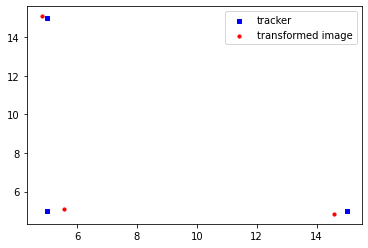

In [19]:
from sklearn.metrics import mean_squared_error

print('tracker_points:\n',tracker_points)
print('image_points:\n',image_points)
# Transform image points into tracker space
print('#Transform image points into tracker space')
transformed_image_points = np.transpose(np.matmul(R, np.transpose(image_points)) + t)
print('transformed_image_points:\n',transformed_image_points)

rmse = mean_squared_error(tracker_points, transformed_image_points, squared=False)
print('RMES or FRE:',rmse)
# Plot tracker points and transformed image points
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(tracker_points[:,0], tracker_points[:,1], s=10, c='b', marker="s", label='tracker')
ax1.scatter(transformed_image_points[:,0], transformed_image_points[:,1], s=10, c='r', marker="o", label='transformed image')
plt.legend(loc='upper right');
plt.show()

# Laparoscopic Liver Surgery Simulations
src: https://mphy0026.readthedocs.io/en/latest/notebooks/lap_liver_sim.html

<img src=https://mphy0026.readthedocs.io/en/latest/_images/lap_liver_sim_diagram.jpg>

In [2]:
!git clone https://github.com/UCL/MPHY0026.git

Cloning into 'MPHY0026'...
remote: Enumerating objects: 5769, done.
remote: Counting objects: 100% (421/421), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 5769 (delta 233), reused 401 (delta 223), pack-reused 5348
Receiving objects: 100% (5769/5769), 444.48 MiB | 27.53 MiB/s, done.
Resolving deltas: 100% (3066/3066), done.
Checking out files: 100% (2478/2478), done.


In [2]:
!pip -q install scikit-surgeryimage scikit-surgerycore scikit-surgeryvtk
!pip -q install scikit-surgerynditracker scikit-surgeryarucotracker scikit-surgerypclcpp 
!pip -q install scikit-surgeryopencvcpp scikit-surgeryfred scikit-surgerybard scikit-surgerycalibration 

     |████████████████████████████████| 44 kB 2.3 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 54.5 MB 32 kB/s 
     |████████████████████████████████| 88.3 MB 98 kB/s 
     |████████████████████████████████| 166.0 MB 27 kB/s 
     |████████████████████████████████| 856 kB 49.8 MB/s 
     |████████████████████████████████| 644 kB 40.6 MB/s 
     |████████████████████████████████| 230 kB 69.5 MB/s 
     |████████████████████████████████| 90 kB 10.7 MB/s 
     |████████████████████████████████| 4.5 MB 32.5 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 1.6 MB 51.2 MB/s 


In [3]:
%cd MPHY0026/doc/notebooks/

/content/MPHY0026/doc/notebooks


In [4]:
# Jupyter notebook sets the cwd to the folder containing the notebook.
# So, you want to add the root of the project to the sys path, so modules load correctly.
import sys
sys.path.append("../../")
# All imports.
import random
import copy
import cv2
import numpy as np
from scipy.spatial.transform import Rotation as R
import sksurgeryopencvpython as cvpy
import matplotlib.pyplot as plt

def extract_rigid_body_parameters(matrix):
    t = matrix[0:3, 3]
    r = matrix[0:3, 0:3]
    r = R.from_matrix(r)
    euler = r.as_euler('zyx', degrees=True)
    return [euler[0], euler[1], euler[2], t[0], t[1], t[2]]

def rigid_body_parameters_to_matrix(params):
    matrix = np.eye(4)
    r = (R.from_euler('zyx', [params[0], params[1], params[2]], degrees=True)).as_matrix()
    matrix[0:3, 0:3] = r
    matrix[0][3] = params[3]
    matrix[1][3] = params[4]
    matrix[2][3] = params[5]
    return matrix

def convert_camera_point_to_world(point, camera_to_marker, marker_to_world):
    return marker_to_world @ camera_to_marker @ point

def convert_4x1_to_1x1x3(p_41):
    p_113 = np.zeros((1,1,3))
    p_113[0][0][0] = p_41[0][0]
    p_113[0][0][1] = p_41[1][0]
    p_113[0][0][2] = p_41[2][0]
    return p_113

def convert_1x2_to_1x1x2(p_12):
    p_112 = np.zeros((1,1,2))
    p_112[0][0][0] = p_12[0]
    p_112[0][0][1] = p_12[1] 
    return p_112

def project_camera_point_to_image(point, intrinsics, distortion):
    rvec = np.zeros((1,3))
    tvec = np.zeros((1,3))
    image_points, jacobian = cv2.projectPoints(convert_4x1_to_1x1x3(point), rvec, tvec, intrinsics, distortion)
    return image_points[0][0] # returns a list
           
def convert_left_camera_to_right_camera(point, left_to_right):
    return left_to_right @ point

def triangulate_points_to_3d(left_point, left_intrinsic, left_distortion, right_point, right_intrinsic, right_distortion, left_to_right):
    left_point_undistorted = cv2.undistortPoints(convert_1x2_to_1x1x2(left_point), left_intrinsic, left_distortion, None, left_intrinsic)
    right_point_undistorted = cv2.undistortPoints(convert_1x2_to_1x1x2(right_point), right_intrinsic, right_distortion, None, right_intrinsic)
    image_points = np.zeros((1,4))
    image_points[0][0] = left_point_undistorted[0][0][0]
    image_points[0][1] = left_point_undistorted[0][0][1]
    image_points[0][2] = right_point_undistorted[0][0][0]
    image_points[0][3] = right_point_undistorted[0][0][1]
    reconstructed = cvpy.triangulate_points_using_hartley(image_points,
                                                          left_intrinsic,
                                                          right_intrinsic,
                                                          left_to_right[0:3, 0:3],
                                                          left_to_right[0:3, 3]
                                                          )
    result = np.ones((4,1))
    result[0][0] = reconstructed[0][0]
    result[1][0] = reconstructed[0][1]
    result[2][0] = reconstructed[0][2]
    return result                                   

def initialise_gold_standard(cam_x, cam_y, cam_z):
    point_in_left_camera_space = np.ones((4,1))
    point_in_left_camera_space[0][0] = cam_x
    point_in_left_camera_space[1][0] = cam_y
    point_in_left_camera_space[2][0] = cam_z
    point_in_right_camera_space = convert_left_camera_to_right_camera(point_in_left_camera_space, left_to_right)

    left_image_point = project_camera_point_to_image(point_in_left_camera_space, left_intrinsics, left_distortion)
    right_image_point = project_camera_point_to_image(point_in_right_camera_space, right_intrinsics, right_distortion)
    reconstructed = triangulate_points_to_3d(left_image_point, left_intrinsics, left_distortion, right_image_point, right_intrinsics, right_distortion, left_to_right)

    assert np.allclose(point_in_left_camera_space, reconstructed)

    gold_standard_world_point = convert_camera_point_to_world(point_in_left_camera_space, camera_to_marker, marker_to_world)
    return point_in_left_camera_space, gold_standard_world_point, left_image_point, right_image_point


Load reference data.
This data comes from the SmartLiver system.

In [5]:
# Camera intrinsic calibration
left_intrinsics = np.loadtxt('LaparoscopicLiverSimulation/lap_liver_left_intrinsics.txt')
left_distortion = np.loadtxt('LaparoscopicLiverSimulation/lap_liver_left_distortion.txt')
right_intrinsics = np.loadtxt('LaparoscopicLiverSimulation/lap_liver_right_intrinsics.txt')
right_distortion = np.loadtxt('LaparoscopicLiverSimulation/lap_liver_right_distortion.txt')

# Hand-eye or, marker-to-camera
marker_to_camera = np.loadtxt('LaparoscopicLiverSimulation/lap_liver_sim_marker_to_camera.txt')
camera_to_marker = np.linalg.inv(marker_to_camera)

# Its a stereo laparoscope, so separation between right and left camera.
left_to_right = np.loadtxt('LaparoscopicLiverSimulation/lap_liver_sim_l2r.txt')

# And it's tracked, so, the marker to world transform.
marker_to_world = np.loadtxt('LaparoscopicLiverSimulation/lap_liver_sim_marker_to_world.txt')

#Create Simulation Parameters
# First parameterise the main transformations.
# The order is: rx, ry, rx, tx, ty, tz, where rotations are in degrees and translations in millimetres.
marker2camera = extract_rigid_body_parameters(marker_to_camera)
marker2world = extract_rigid_body_parameters(marker_to_world)
left2right = extract_rigid_body_parameters(left_to_right)

# Create some fixed parameters
image_size = (1920, 1080) # width, height, in pixels
distance_from_camera = 75 # millimetres

Create Gold Standard. We need to define the thing we are measuring or evaluating. Imagine we are trying to assess the accuracy of triangulating a point that is in front of the camera, and correctly positioning it in world space. So, first, generate a point in camera coordinates, project to 2D left and right images, triangulate back to 3D, to check we get the same point, and convert to world space.

In [6]:
gold_left_camera_point, gold_world_point, gold_left_image_point, gold_right_image_point = initialise_gold_standard(5, 10, distance_from_camera)

print("Starting gold standard:")
print("Left camera point:" + str(gold_left_camera_point))
print("World point:" + str(gold_world_point))
print("Left image point:" + str(gold_left_image_point))
print("Right image point:" + str(gold_right_image_point))

Starting gold standard:
Left camera point:[[ 5.]
 [10.]
 [75.]
 [ 1.]]
World point:[[ 1.02579661e+02]
 [ 2.55747093e+00]
 [-1.76820496e+03]
 [ 1.00000000e+00]]
Left image point:[904.48111684 790.14748833]
Right image point:[1028.96090457  791.28608348]


Experiment 1: Effect of noise on 2D feature detector<br>
So, given the gold standard we have established, we can start to investigate characteristics of the system. For example, if we are triangulating points, then how accurate will it be. Or put another way, what is the effect of errors in our feature detector?

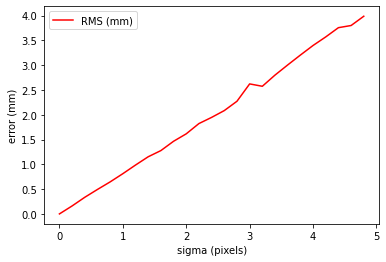

In [7]:
left_image_point = np.zeros((2))
right_image_point = np.zeros((2))
number_samples = 1000
x_values = []
y_values = []
for sigma_counter in range(0, 25, 1):
    sigma = sigma_counter / 5
    rms = 0
    for i in range(number_samples):
        left_image_point[0] = gold_left_image_point[0] + random.normalvariate(0, sigma)
        left_image_point[1] = gold_left_image_point[1] + random.normalvariate(0, sigma)
        right_image_point[0] = gold_right_image_point[0] + random.normalvariate(0, sigma)
        right_image_point[1] = gold_right_image_point[1] + random.normalvariate(0, sigma)
        left_camera_point = triangulate_points_to_3d(left_image_point,
                                                     left_intrinsics,
                                                     left_distortion,
                                                     right_image_point,
                                                     right_intrinsics,
                                                     right_distortion,
                                                     left_to_right)
        left_world_point = convert_camera_point_to_world(left_camera_point,
                                                         camera_to_marker,
                                                         marker_to_world
                                                        )
        diff = np.linalg.norm(gold_world_point - left_world_point)
        diff = diff * diff
        rms = rms + diff
    rms = rms / number_samples
    rms = np.sqrt(rms)
    x_values.append(sigma)
    y_values.append(rms)

plt.plot(x_values, y_values, 'r', label='RMS (mm)')
plt.legend(loc='upper left')
plt.xlabel('sigma (pixels)')
plt.ylabel('error (mm)')
plt.show()

Experiment 1: Discussion, Conclusion<br>
So as noise increases, so does the triangulation error in millimetres. So, we know that our feature detector for triangulation purposes must be sub-pixel accuracy to get triangulation accuracy around 1mm.

Experiment 2: Accuracy of stereo calibration<br>
What is the effect of inaccuracies in our stereo calibration?

What is the effect of inaccuracies in our stereo calibration?
[-0.18663586637738608, -1.022194275896184, -0.31552983713490357, -6.05146, 0.058148, -0.143609]


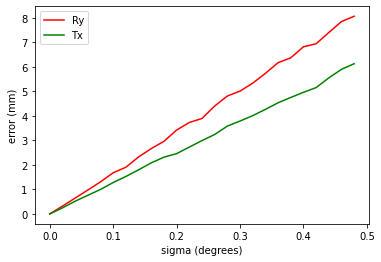

In [9]:
print('What is the effect of inaccuracies in our stereo calibration?')
print(left2right)
#So, rotation about y axis, or translation in x-axis are of interest.
number_samples = 1000
x_values = []
y_values = []
for sigma_counter in range(0, 25, 1):
    sigma = sigma_counter / 50
    rms = 0
    for i in range(number_samples):
        tmp_left2right = copy.deepcopy(left2right)
        tmp_left2right[1] = tmp_left2right[1] + random.normalvariate(0, sigma)
        tmp_stereo_matrix = rigid_body_parameters_to_matrix(tmp_left2right)
        left_camera_point = triangulate_points_to_3d(gold_left_image_point,
                                                     left_intrinsics,
                                                     left_distortion,
                                                     gold_right_image_point,
                                                     right_intrinsics,
                                                     right_distortion,
                                                     tmp_stereo_matrix)
        left_world_point = convert_camera_point_to_world(left_camera_point,
                                                         camera_to_marker,
                                                         marker_to_world
                                                        )
        diff = np.linalg.norm(gold_world_point - left_world_point)
        diff = diff * diff
        rms = rms + diff
    rms = rms / number_samples
    rms = np.sqrt(rms)
    x_values.append(sigma)
    y_values.append(rms)

rotation_values = copy.deepcopy(y_values)

# Repeat of above, just doing translation.
y_values = []
for sigma_counter in range(0, 25, 1):
    sigma = sigma_counter / 50
    rms = 0
    for i in range(number_samples):
        tmp_left2right = copy.deepcopy(left2right)
        tmp_left2right[3] = tmp_left2right[3] + random.normalvariate(0, sigma)
        tmp_stereo_matrix = rigid_body_parameters_to_matrix(tmp_left2right)
        left_camera_point = triangulate_points_to_3d(gold_left_image_point,
                                                     left_intrinsics,
                                                     left_distortion,
                                                     gold_right_image_point,
                                                     right_intrinsics,
                                                     right_distortion,
                                                     tmp_stereo_matrix)
        left_world_point = convert_camera_point_to_world(left_camera_point,
                                                         camera_to_marker,
                                                         marker_to_world
                                                        )
        diff = np.linalg.norm(gold_world_point - left_world_point)
        diff = diff * diff
        rms = rms + diff
    rms = rms / number_samples
    rms = np.sqrt(rms)
    y_values.append(rms)

translation_values = copy.deepcopy(y_values)

plt.plot(x_values, rotation_values, 'r', label='Ry')
plt.plot(x_values, translation_values, 'g', label='Tx')
plt.legend(loc='upper left')
plt.xlabel('sigma (degrees)')
plt.ylabel('error (mm)')
plt.show()

Experiment 2: Discussion and Conclusion<br>
These numbers are interesting. With only 4-6mm baseline, the system is very sensitive to changes in the stereo calibration parameters. The standard deviation on both rotation and translation, should be less than tenths of a millimetre or degree. This is exceptionally hard to achieve as each calibration gives numbers that vary by more than this. This suggests that we cannot be confident about the stereo calibration, and it should probably be done once by an engineer, under lab conditions, checked, and not done by a user in the field.

Experiment 3: Accuracy of hand-eye calibration<br>
Similarly for hand-eye. Harder to isolate calibration errors to individual parameters. So, we will try just adding noise to all parameters.


[88.04229429051159, -41.70296857104104, -149.50452705845592, 20.81503, 131.959603, -247.139331]


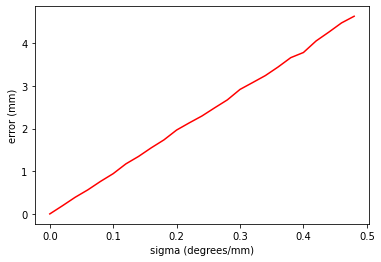

In [10]:
print(marker2camera)
number_samples = 1000
x_values = []
y_values = []
for sigma_counter in range(0, 25, 1):
    sigma = sigma_counter / 50
    rms = 0
    for i in range(number_samples):
        tmp_marker2camera = copy.deepcopy(marker2camera)
        for j in range(6):
            tmp_marker2camera[j] = tmp_marker2camera[j] + random.normalvariate(0, sigma)
        tmp_marker2camera_matrix = rigid_body_parameters_to_matrix(tmp_marker2camera)
        tmp_camera2marker = np.linalg.inv(tmp_marker2camera_matrix)
        left_world_point = convert_camera_point_to_world(gold_left_camera_point,
                                                         tmp_camera2marker,
                                                         marker_to_world
                                                        )
        diff = np.linalg.norm(gold_world_point - left_world_point)
        diff = diff * diff
        rms = rms + diff
    rms = rms / number_samples
    rms = np.sqrt(rms)
    x_values.append(sigma)
    y_values.append(rms)

plt.plot(x_values, y_values, 'r')
plt.xlabel('sigma (degrees/mm)')
plt.ylabel('error (mm)')
plt.show()

Experiment 3: Brief Discussion and Conclusion<br>
So, it can be seen that any noise on the calibration parameters of hand-eye calibration can have a huge affect on the final accuracy of the ability to measure the location of a world/tracker coordinate. The x-axis shows sigma, which is is used, assuming a Gaussian noise model, to add noise to the 3 rotation and 3 translation parameters of the hand-eye matrix. You can see that these parameters must be correct to within a sigma of 0.2 millimetres or degrees in order to keep the accuracy of measurement within 2mm. So, is this realistic, in the field? You should do a user study and look at the variation in calibration parameters when many users do many calibrations. If the variability in the calibration parameters that you see in the field, is larger than this, could we ever assume that system accuracy is good enough in practice? If not, then how would you design your tracking marker and laparoscope? Is calibration something that the user should be doing? If nott, what should the vendor do?

#RANSAC example
src:https://github.com/UCL/MPHY0026/blob/master/doc/notebooks/RANSAC.ipynb<br>
In this example, we compare the performance of a normal algebraic one step (AOS) Pivot Calibration [Yaniv2010], with a RANSAC version of the same algorithm.

In [13]:
import sys
sys.path.append("../../")
from glob import glob
import copy
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Note that the scikit-surgery libraries provide pivot and RANSAC. 
import sksurgerycalibration.algorithms.pivot as p   # AOS Pivot algorithm and a RANSAC version.
import sksurgerycore.transforms.matrix as m  # For creating 4x4 matrices.

# Load test data
file_names = glob('PivotCalibrationData/*')
arrays = [np.loadtxt(f) for f in file_names]
matrices = np.concatenate(arrays)
number_of_matrices = int(matrices.size/16)
tracking_matrices = matrices.reshape(number_of_matrices, 4, 4)
print(tracking_matrices.shape)

# Do a normal pivot calibration using all data.
offset_1, pivot_1, residual_1 = p.pivot_calibration(tracking_matrices)
print("Offset is:" + str(offset_1))
print("Pivot is:" + str(pivot_1))
print("RMS error about centroid is:" + str(residual_1))

print('So, if we add noisy data, we should be able to see the difference between\
 a normal pivot calibration (least squares), and the RANSAC version. We have about 1000 matrices, so lets add noise up to 100 of them.')

(1151, 4, 4)
Offset is:[[-14.47617201]
 [395.14282161]
 [ -7.55790421]]
Pivot is:[[ -805.28473588]
 [  -85.44779266]
 [-2112.0664371 ]]
RMS error about centroid is:1.838466442010008
So, if we add noisy data, we should be able to see the difference between a normal pivot calibration (least squares), and the RANSAC version. We have about 1000 matrices, so lets add noise up to 100 of them.


RANSAC Pivot, from 1151 matrices, used 1010 matrices, with error threshold = 4 and consensus threshold = 0.25
RANSAC Pivot, from 1151 matrices, used 929 matrices, with error threshold = 4 and consensus threshold = 0.25
RANSAC Pivot, from 1151 matrices, used 1006 matrices, with error threshold = 4 and consensus threshold = 0.25
RANSAC Pivot, from 1151 matrices, used 945 matrices, with error threshold = 4 and consensus threshold = 0.25
RANSAC, iteration 8, failed.
RANSAC Pivot, from 1151 matrices, used 924 matrices, with error threshold = 4 and consensus threshold = 0.25
RANSAC Pivot, from 1151 matrices, used 889 matrices, with error threshold = 4 and consensus threshold = 0.25
RANSAC Pivot, from 1151 matrices, used 930 matrices, with error threshold = 4 and consensus threshold = 0.25
RANSAC, iteration 8, failed.
RANSAC Pivot, from 1151 matrices, used 850 matrices, with error threshold = 4 and consensus threshold = 0.25
RANSAC Pivot, from 1151 matrices, used 879 matrices, with error thre

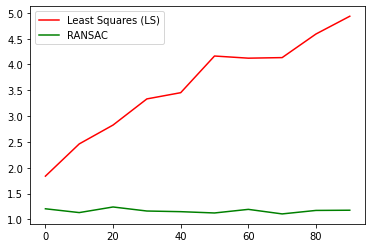

In [15]:
# Parameters to play with
number_of_matrices_to_add_noise_to = 100
rotation_offset_in_degrees = 5
translation_offset_in_millimetres = 5
number_iterations = 10
error_in_millimetres = 4
minimum_percentage = 0.25

# Create an array representing how many to add noise to.
rms_error_ls = []
rms_error_RANSAC = []
x_values = []
indices = range(tracking_matrices.shape[0])
for counter in range(0, number_of_matrices_to_add_noise_to, 10):
    matrices_copy = copy.deepcopy(tracking_matrices)
    random_indices = random.sample(indices, counter)
    for random_index in random_indices:
        random_rotation = m.construct_rotm_from_euler((np.random.rand() * rotation_offset_in_degrees*2)-rotation_offset_in_degrees,
                                                      (np.random.rand() * rotation_offset_in_degrees*2)-rotation_offset_in_degrees,
                                                      (np.random.rand() * rotation_offset_in_degrees*2)-rotation_offset_in_degrees,
                                                      "zyx", is_in_radians=False)
        random_translation = np.zeros((3,1))
        random_translation[0][0] = (np.random.rand() * translation_offset_in_millimetres*2)-translation_offset_in_millimetres
        random_translation[1][0] = (np.random.rand() * translation_offset_in_millimetres*2)-translation_offset_in_millimetres
        random_translation[2][0] = (np.random.rand() * translation_offset_in_millimetres*2)-translation_offset_in_millimetres
        random_transform = m.construct_rigid_transformation(random_rotation, random_translation)
        matrices_copy[random_index] = matrices_copy[random_index] @ random_transform
    offset_2, pivot_2, residual_2 = p.pivot_calibration(matrices_copy)
    offset_3, pivot_3, residual_3 = p.pivot_calibration_with_ransac(matrices_copy, number_iterations, error_in_millimetres, minimum_percentage)
    x_values.append(counter)
    rms_error_ls.append(residual_2)
    rms_error_RANSAC.append(residual_3)

plt.plot(x_values, rms_error_ls, 'r', label='Least Squares (LS)')  
plt.plot(x_values, rms_error_RANSAC, 'g', label='RANSAC') 
plt.legend(loc='upper left')
plt.show()